In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
import folium
from folium.plugins import HeatMap
warnings.filterwarnings('ignore')

In [65]:
family = pd.read_csv('Family Income and Expenditure.csv')

In [66]:
family

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [67]:
family.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [68]:
family['Household Head Occupation'] = family['Household Head Occupation'].fillna('unknown')
family['Household Head Class of Worker'] = family['Household Head Class of Worker'].fillna('unknown')
family['Toilet Facilities'] = family['Toilet Facilities'].fillna('unknown')

In [69]:
family.isnull().sum()

Total Household Income                           0
Region                                           0
Total Food Expenditure                           0
Main Source of Income                            0
Agricultural Household indicator                 0
Bread and Cereals Expenditure                    0
Total Rice Expenditure                           0
Meat Expenditure                                 0
Total Fish and  marine products Expenditure      0
Fruit Expenditure                                0
Vegetables Expenditure                           0
Restaurant and hotels Expenditure                0
Alcoholic Beverages Expenditure                  0
Tobacco Expenditure                              0
Clothing, Footwear and Other Wear Expenditure    0
Housing and water Expenditure                    0
Imputed House Rental Value                       0
Medical Care Expenditure                         0
Transportation Expenditure                       0
Communication Expenditure      

In [70]:
family.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

In [71]:
family['Region'] = family['Region'].astype('category')
family['Main Source of Income'] = family['Main Source of Income'].astype('category')
family['Household Head Sex'] = family['Household Head Sex'].astype('category')
family['Household Head Marital Status'] = family['Household Head Marital Status'].astype('category')
family['Household Head Highest Grade Completed'] = family['Household Head Highest Grade Completed'].astype('category')
family['Household Head Job or Business Indicator'] = family['Household Head Job or Business Indicator'].astype('category')
family['Household Head Occupation'] = family['Household Head Occupation'].astype('category')
family['Household Head Class of Worker'] = family['Household Head Class of Worker'].astype('category')
family['Type of Household'] = family['Type of Household'].astype('category')
family['Type of Building/House'] = family['Type of Building/House'].astype('category')
family['Type of Roof'] = family['Type of Roof'].astype('category')
family['Type of Walls'] = family['Type of Walls'].astype('category')
family['Tenure Status'] = family['Tenure Status'].astype('category')
family['Toilet Facilities'] = family['Toilet Facilities'].astype('category')
family['Main Source of Water Supply'] = family['Main Source of Water Supply'].astype('category')

In [72]:
family.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

In [73]:
family.dtypes

Total Household Income                              int64
Region                                           category
Total Food Expenditure                              int64
Main Source of Income                            category
Agricultural Household indicator                    int64
Bread and Cereals Expenditure                       int64
Total Rice Expenditure                              int64
Meat Expenditure                                    int64
Total Fish and  marine products Expenditure         int64
Fruit Expenditure                                   int64
Vegetables Expenditure                              int64
Restaurant and hotels Expenditure                   int64
Alcoholic Beverages Expenditure                     int64
Tobacco Expenditure                                 int64
Clothing, Footwear and Other Wear Expenditure       int64
Housing and water Expenditure                       int64
Imputed House Rental Value                          int64
Medical Care E

<hr>
<h1>1. How does the total number of family members vary across different types of households?</h1>

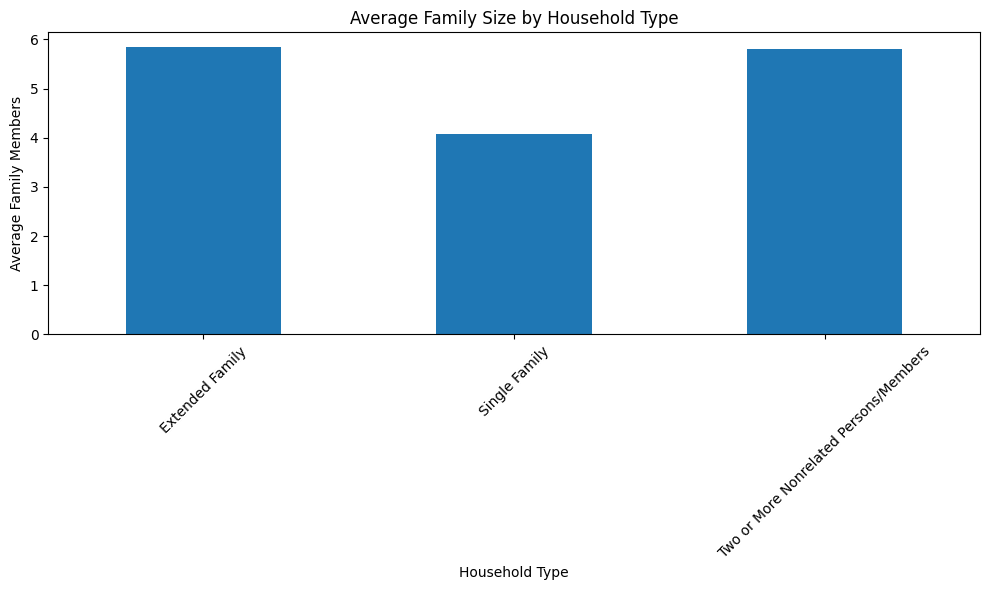

Type of Household
Extended Family                           5.850758
Single Family                             4.075690
Two or More Nonrelated Persons/Members    5.802395
Name: Total Number of Family members, dtype: float64


In [74]:
fa = family.groupby('Type of Household')['Total Number of Family members'].mean()
fa.plot(kind='bar', figsize=(10, 6))
plt.title('Average Family Size by Household Type')
plt.xlabel('Household Type')
plt.ylabel('Average Family Members')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(fa)

<h1>Insight 1<h1>

<h5>The bar chart displays the average number of family members categorized by different household types. It shows that extended families and households with nonrelated individuals have larger average sizes (5.85 and 5.80, respectively), while single-family households are smaller (4.08). This reflects differences in living arrangements and family structures.</h5>

<hr>
<h1>2. How does the age of the household head relate to the size of the household?</h1>

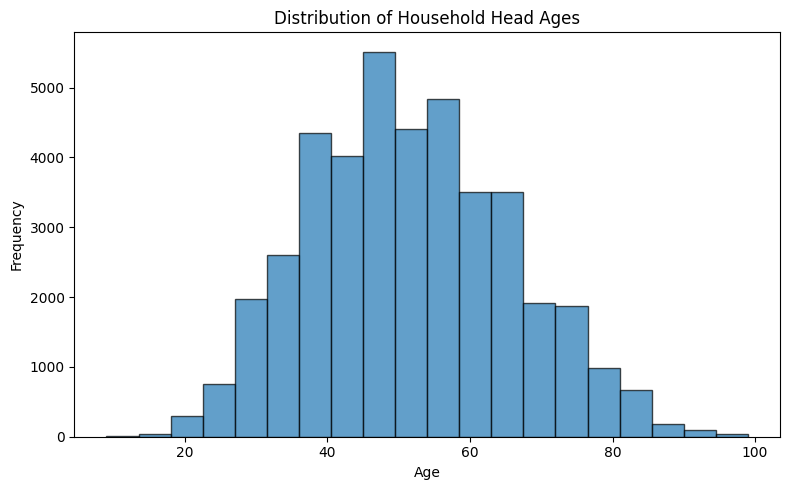

In [75]:
plt.figure(figsize=(8, 5))
plt.hist(family['Household Head Age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Household Head Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<h1>Insight 2<h1>
<h5>The histogram shows that most household heads are middle-aged, with the highest frequency between 45 and 50 years old. This suggests that households are typically led by individuals during their family-raising years, with fewer households headed by younger or older individuals.</h5>

<hr>
<h1>3. What is the distribution of marital status among household heads?</h1>

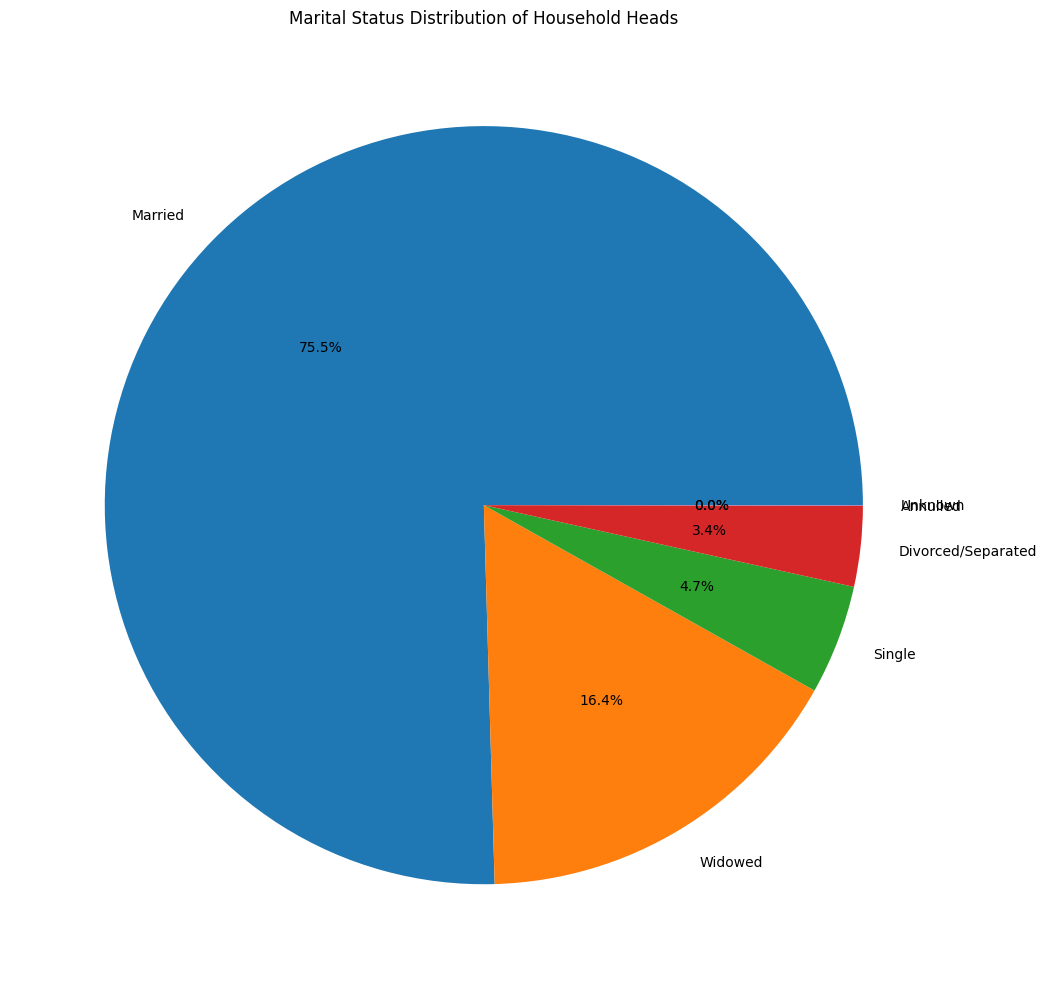

Household Head Marital Status
Married               31347
Widowed                6818
Single                 1942
Divorced/Separated     1425
Annulled                 11
Unknown                   1
Name: count, dtype: int64


In [76]:
status = family['Household Head Marital Status'].value_counts()
status.plot(kind='pie', autopct='%1.1f%%', figsize=(13, 10))
plt.title('Marital Status Distribution of Household Heads')
plt.ylabel('')
plt.tight_layout()
plt.show()
print(status)

<h1>Insight 3<h1>
<h5>The pie chart displays the proportional distribution of marital status among household heads. The majority of household heads are married(75.5 % or 31,347), followed by a smaller but notable proportion of widowed(16.4% or 6,818), single(4.7% or 1,942), divorced/seperated(3.4% or 1425).</h5>

<hr>
<h1> 4. What is the Most Common Main Source of Income among different types of households?<h1>

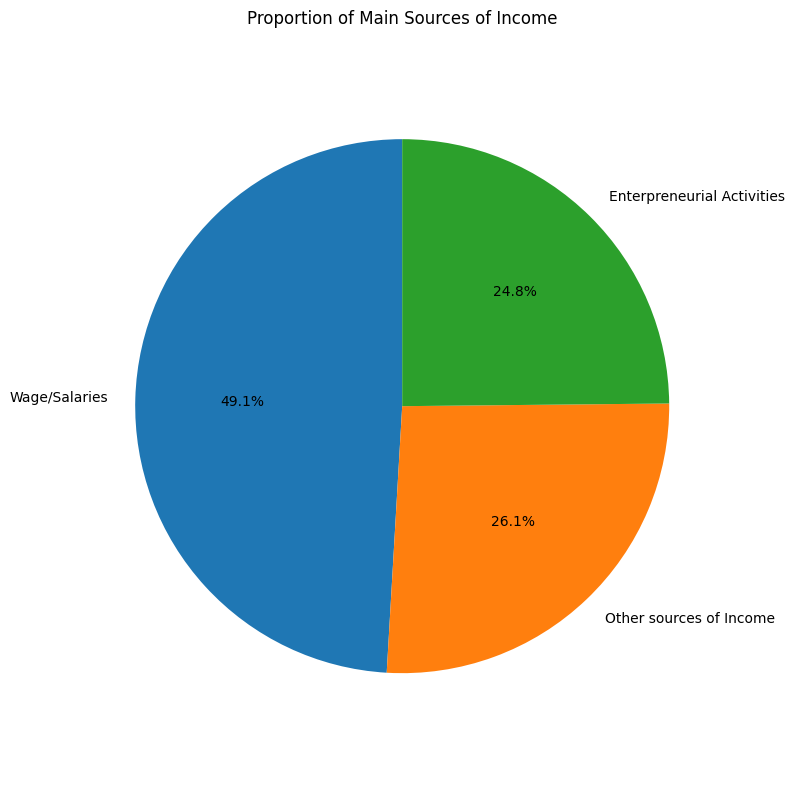

In [77]:
income_counts = family['Main Source of Income'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Main Sources of Income')
plt.axis('equal')  
plt.tight_layout()
plt.show()

<h1>Insight 4<h1>

<h5>The most common main source of income across all households is wage/salaries , with 20,388 or 49.1% households reporting this as their primary income source. This is significantly higher than entrepreneurial activities (10,320 or 24.8%) and other sources of income (10,836 or 26.1%).</h5>

<hr>
<h1>5. How does the total household income differ based on the main source of income?</h1>

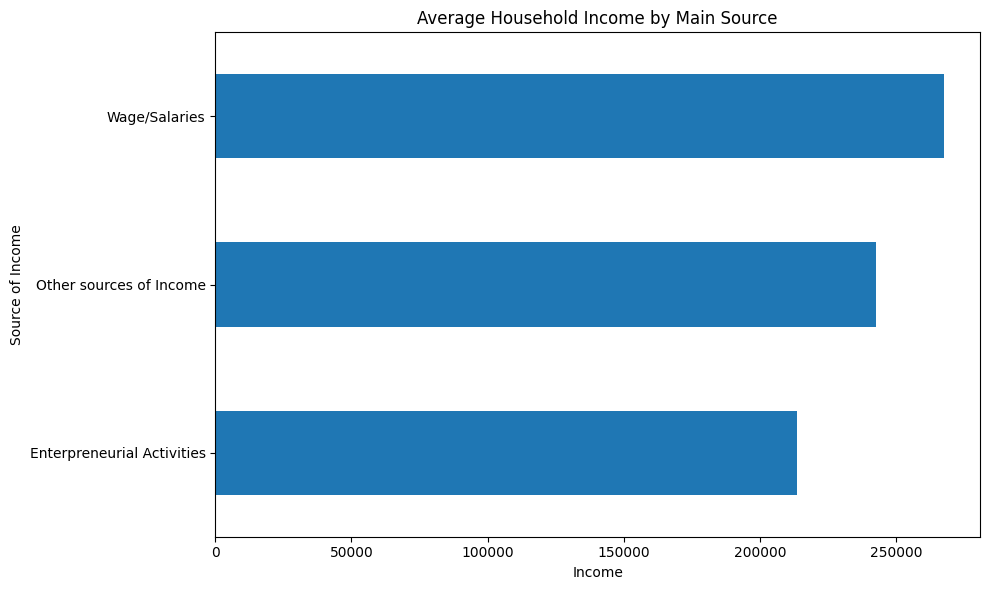

In [ ]:
family.groupby('Main Source of Income')['Total Household Income'].mean().sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Average Household Income by Main Source')
plt.xlabel('Income')
plt.ylabel('Source of Income')
plt.tight_layout()
plt.show()

<h1>Insight 5<h1>

<h5>Based on the graph, households with wage/salaries as their main income source have the highest average total household income, followed by those with other sources of income, while entrepreneurial activities are associated with the lowest average income. This suggests that employment-based earnings tend to result in higher household incomes compared to self-employment or alternative income sources.</h5>

<hr>
<h1>6. How does the main source of income vary by marital status of the household head?</h1>

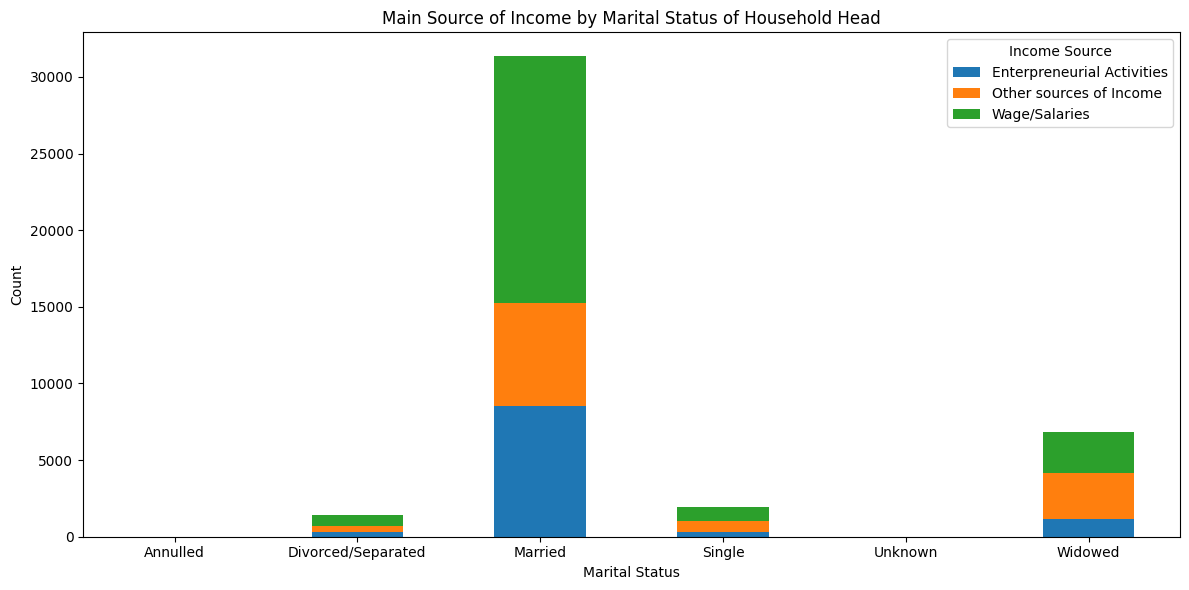

Main Source of Income          Enterpreneurial Activities  \
Household Head Marital Status                               
Annulled                                                2   
Divorced/Separated                                    279   
Married                                              8550   
Single                                                323   
Unknown                                                 0   
Widowed                                              1166   

Main Source of Income          Other sources of Income  Wage/Salaries  
Household Head Marital Status                                          
Annulled                                             1              8  
Divorced/Separated                                 426            720  
Married                                           6671          16126  
Single                                             725            894  
Unknown                                              0              1  
Widowed

In [78]:
marital_income = pd.crosstab(
    index=family['Household Head Marital Status'],
    columns=family['Main Source of Income']
)

# Plot stacked bar chart
marital_income.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Main Source of Income by Marital Status of Household Head')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Income Source')
plt.tight_layout()
plt.show()
print(marital_income)

<h1>Insight 6<h1>
<h5>The stacked bar chart illustrates the distribution of main income sources across different marital statuses of household heads. Married heads predominantly report income from salaries/wages and entrepreneurial, while single and widowed heads show more diverse or smaller shares from these sources, sometimes relying more on remittances or self-employment.</h5>

<hr>
<h1>7. How is total household income distributed for married vs unmarried household heads?</h1>

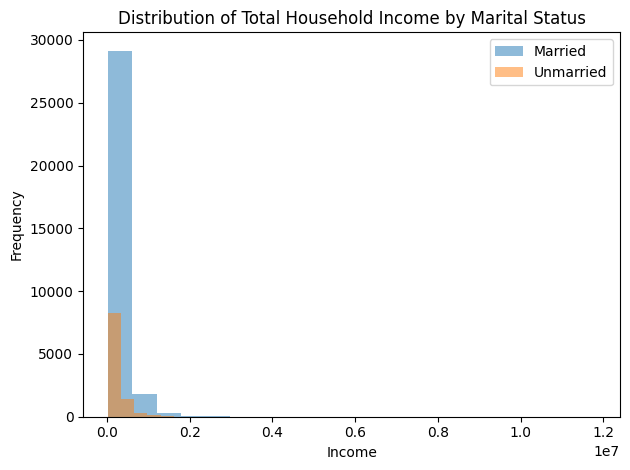

In [79]:
married_income = family[family['Household Head Marital Status'] == 'Married']['Total Household Income']
unmarried_income = family[family['Household Head Marital Status'] != 'Married']['Total Household Income']

plt.hist(married_income, bins=20, alpha=0.5, label='Married')
plt.hist(unmarried_income, bins=20, alpha=0.5, label='Unmarried')
plt.title('Distribution of Total Household Income by Marital Status')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

<h1>Insight 7<h1>

<h5>

- The histogram compares the distribution of total household income between married and unmarried (single, widowed, separated, divorced) household heads. Married households generally show a higher frequency in higher income brackets, whereas unmarried households tend to cluster more in the lower to middle income ranges.

- Married household heads typically have higher total household incomes due to combined earning potential, shared financial resources, and often greater economic stability. Unmarried household heads may rely on a single income source, which can limit their overall household income. This difference underscores the economic advantage of dual-income households and highlights potential vulnerabilities faced by unmarried or single-parent households.</h5>

<hr>
<h1>8. Which marital status group is more likely to own a refrigerator or television?</h1>

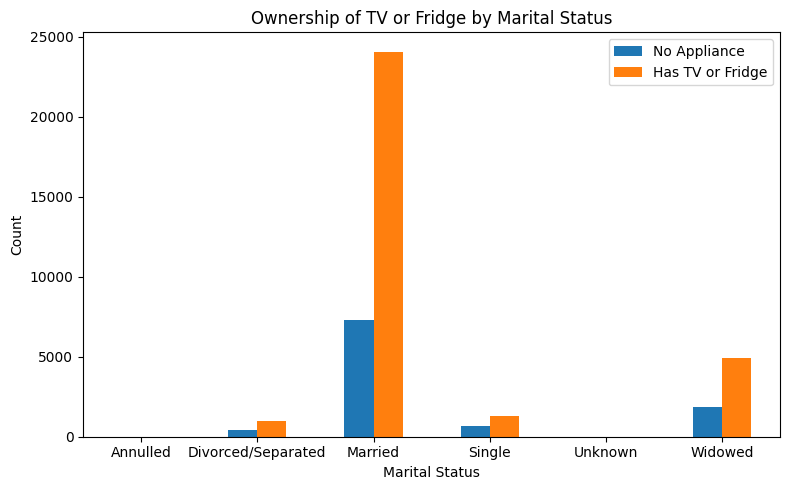

Owns_Appliance                 False  True 
Household Head Marital Status              
Annulled                           1     10
Divorced/Separated               448    977
Married                         7281  24066
Single                           657   1285
Unknown                            0      1
Widowed                         1885   4933


In [80]:
family['Owns_Appliance'] = ((family['Number of Refrigerator/Freezer'] > 0) |
                            (family['Number of Television'] > 0))

ownership = pd.crosstab(
    index=family['Household Head Marital Status'],
    columns=family['Owns_Appliance']
)

ownership.plot(kind='bar', figsize=(8, 5))
plt.title('Ownership of TV or Fridge by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['No Appliance', 'Has TV or Fridge'])
plt.tight_layout()
plt.show()
print(ownership)

<h1>Insight 8<h1>

<h5>

- Married and widowed household heads are more likely to own a TV or refrigerator due to economic stability, household needs, and life stage, while single or separated individuals tend to have lower ownership, reflecting limited resources or smaller living arrangements.

- Married households often benefit from dual incomes or financial pooling, allowing for the purchase of durable goods like TVs and refrigerators.

- According to the Philippine Statistics Authority (PSA, 2021), married households tend to report higher average incomes and expenditures than single or separated individuals.

</h5>

<hr>
<h1>9. What are the most common types of houses in the dataset?</h1>

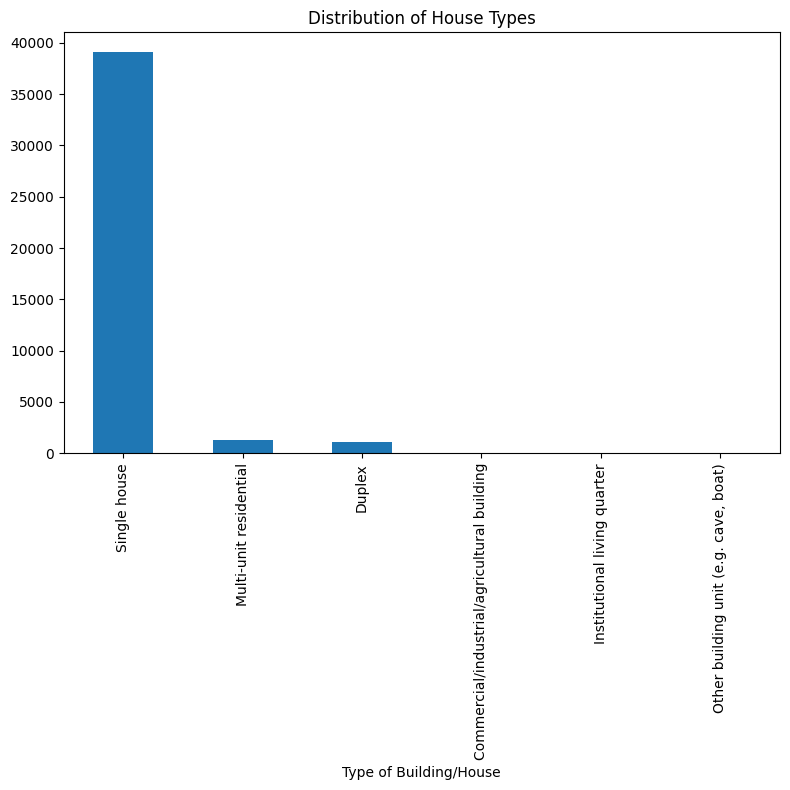

Type of Building/House
Single house                                   39069
Multi-unit residential                          1329
Duplex                                          1084
Commercial/industrial/agricultural building       51
Institutional living quarter                       9
Other building unit (e.g. cave, boat)              2
Name: count, dtype: int64


In [81]:
family['Type of Building/House'].value_counts().plot(kind='bar', figsize=(8, 8))
plt.title('Distribution of House Types')
plt.ylabel('')
plt.tight_layout()
plt.show()
print(family['Type of Building/House'].value_counts())

<h1>Insight 9<h1>

<h5>

- The bar chart displays the majority of households reside in single houses(39,069), followed by multi-residential(1,329), duplex(1,084), commercial/industrial/agricultural(51), institutional living quarter(9), and 2 on the other building unit.

- The dominance of single houses reflects cultural norms, land availability, and the rural makeup of many areas. Urban housing types like multi-unit residences and duplexes appear in smaller numbers, while nonstandard or institutional housing remains rare. This pattern is typical of many developing nations where homeownership of detached houses remains the aspiration and norm.

- According to the Philippine Statistics Authority (PSA, 2020), more than 80% of Filipino households live in single houses.

</h5>

<hr>
<h1>10. Which house types are more likely to have access to improved toilet facilities?</h1>

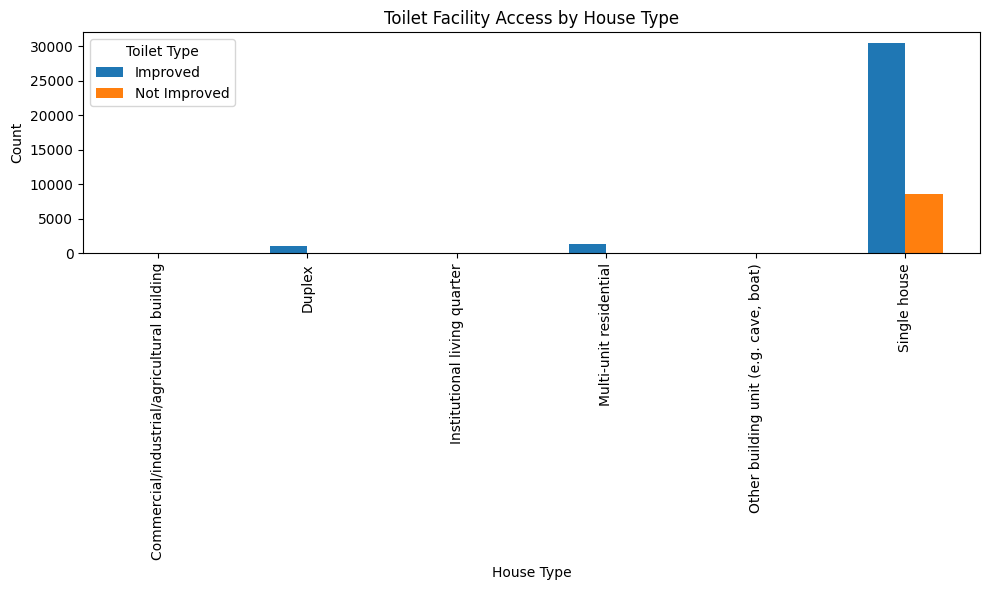

Improved_Toilet                              Improved  Not Improved
Type of Building/House                                             
Commercial/industrial/agricultural building        45             6
Duplex                                           1014            70
Institutional living quarter                        5             4
Multi-unit residential                           1271            58
Other building unit (e.g. cave, boat)               0             2
Single house                                    30521          8548


In [82]:
family['Improved_Toilet'] = family['Toilet Facilities'].apply(lambda x: 'Improved' if 'flush' in str(x).lower() or 'septic' in str(x).lower() else 'Not Improved')

toilet_by_house = pd.crosstab(
    index=family['Type of Building/House'],
    columns=family['Improved_Toilet']
)

toilet_by_house.plot(kind='bar', figsize=(10, 6))
plt.title('Toilet Facility Access by House Type')
plt.xlabel('House Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Toilet Type')
plt.tight_layout()
plt.show()
print(toilet_by_house)

<h1>Insight 10<h1>

<h5>

- The bar chart shows that multi-unit residential buildings(1,271), duplexes(1,014), and single houses(30,521) have the highest counts of improved toilet facilities, which is also got the highest number of not improved toilet facilities.

- Urban housing types such as multi-unit residential buildings and duplexes are usually built in areas with planned sanitation infrastructure, making it easier to install and maintain improved toilet systems.

- Households in formal homes (like single houses and duplexes) tend to have higher income, allowing them to invest in improved sanitation systems.

- According to the World Bank (2016) and Asian Development Bank (2021), household wealth and home ownership strongly correlate with the availability of in-home sanitation facilities.

</h5>

<hr>
<h1>11. How does electricity access vary across different house types?</h1>

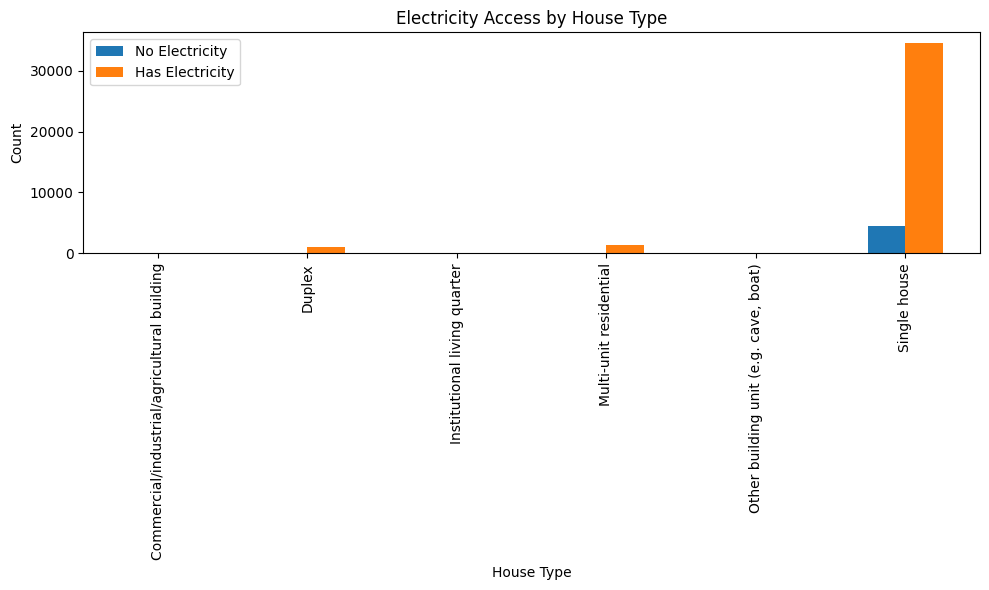

Electricity                                     0      1
Type of Building/House                                  
Commercial/industrial/agricultural building     3     48
Duplex                                         52   1032
Institutional living quarter                    2      7
Multi-unit residential                         14   1315
Other building unit (e.g. cave, boat)           2      0
Single house                                 4463  34606


In [83]:
electricity_by_house = pd.crosstab(
    index=family['Type of Building/House'],
    columns=family['Electricity']
)

electricity_by_house.plot(kind='bar', figsize=(10, 6))
plt.title('Electricity Access by House Type')
plt.xlabel('House Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(['No Electricity', 'Has Electricity'])
plt.tight_layout()
plt.show()
print(electricity_by_house)

<h1>Insight 11<h1>

<h5>

- The bar chart illustrates electricity access across different housing types. Conventional housing particularly single houses, multi-unit residential buildings, and duplexes are often located in areas connected to public utilities that shows high electricity access. In contrast, "Other building unit (e.g., cave, boat)" are typically outside formal infrastructure zones, hence have little to no electricity.

- Philippine Statistics Authority (PSA) reports show that electricity access is higher in urban and planned residential zones.

- This disparity also reflects in asset ownership. Households in formal, urban housing types tend to own more modern assets due to better infrastructure, higher income, and economic stability. Conversely, informal dwellings typically show lower ownership, indicating poverty and limited access to utilities.



</h5>


<hr>
<h1>12. How does the main source of water supply vary by house type?</h1>

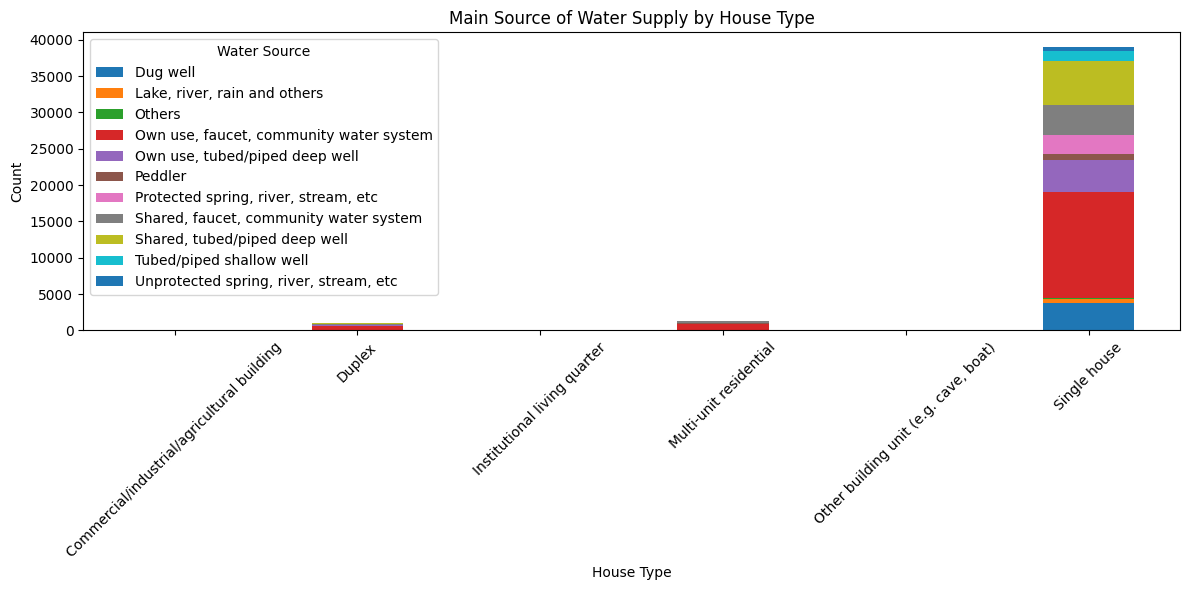

Main Source of Water Supply                  Dug well  \
Type of Building/House                                  
Commercial/industrial/agricultural building         2   
Duplex                                             30   
Institutional living quarter                        1   
Multi-unit residential                             10   
Other building unit (e.g. cave, boat)               0   
Single house                                     3833   

Main Source of Water Supply                  Lake, river, rain and others  \
Type of Building/House                                                      
Commercial/industrial/agricultural building                             0   
Duplex                                                                  1   
Institutional living quarter                                            0   
Multi-unit residential                                                  2   
Other building unit (e.g. cave, boat)                                   0   
Sing

In [84]:
water_by_house = pd.crosstab(
    index=family['Type of Building/House'],
    columns=family['Main Source of Water Supply']
)

water_by_house.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Main Source of Water Supply by House Type')
plt.xlabel('House Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Water Source')
plt.tight_layout()
plt.show()
print(water_by_house)

<h1>Insight 12<h1>

<h5>

- The stacked bar chart shows the distribution of different main sources of water supply across various house types. But it is noticeable that the single house got their water sources from anywhere. It is clearly shown that the main source of water from different house types are came from their own use, faucet, and water community system.

</h5>

<hr>
<h1>13. Is there a link between house type and ownership of modern assets like TVs or cellphones?</h1>

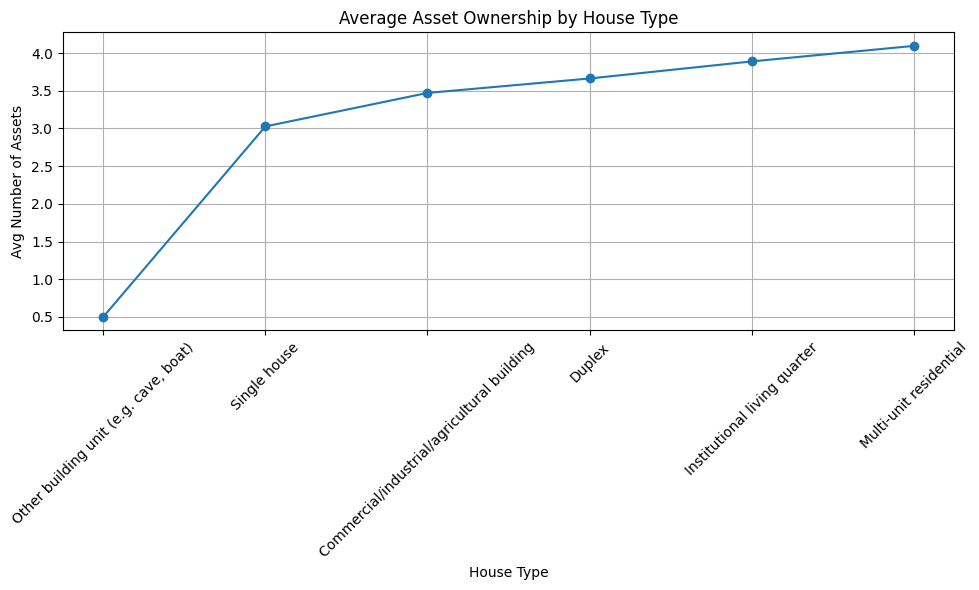

Type of Building/House
Other building unit (e.g. cave, boat)          0.500000
Single house                                   3.026236
Commercial/industrial/agricultural building    3.470588
Duplex                                         3.662362
Institutional living quarter                   3.888889
Multi-unit residential                         4.094808
Name: Asset_Score, dtype: float64


In [85]:
family['Asset_Score'] = (
    family['Number of Television'] +
    family['Number of Cellular phone'] +
    family['Number of Personal Computer']
)

asset_by_house = family.groupby('Type of Building/House')['Asset_Score'].mean().sort_values()

asset_by_house.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Asset Ownership by House Type')
plt.xlabel('House Type')
plt.ylabel('Avg Number of Assets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(asset_by_house)

<h1>Insight 13<h1>

<h5>

- The line chart shows that households in urbanized, structured housing types (e.g., multi-unit buildings, institutional quarters) own more modern assets than those in informal dwellings (e.g., caves, boats). This is due to better access to infrastructure, higher income levels, and economic stability in urban areas.

- The World Bank’s Digital Adoption Index shows that digital asset ownership (phones, PCs) is higher in urbanized, structured living settings, due to affordability and service availability.

</h5>

<hr>
<h1>14. Do households with higher income exhibit significantly different spending on education and health services?</h1>

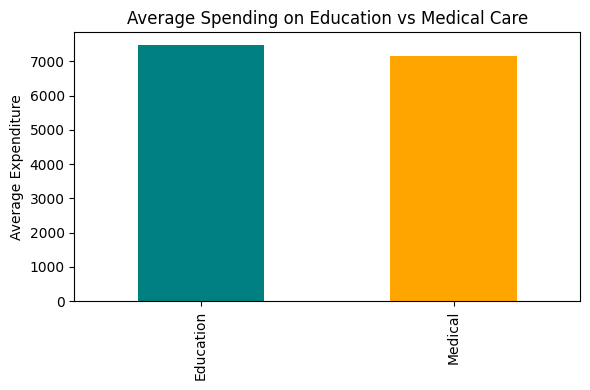

{'Education': np.float64(7473.500481417293), 'Medical': np.float64(7160.230935875216)}


In [ ]:
spending = {
    'Education': family['Education Expenditure'].mean(),
    'Medical': family['Medical Care Expenditure'].mean()
}

pd.Series(spending).plot(kind='bar', figsize=(6, 4), color=['teal', 'orange'])
plt.title('Average Spending on Education vs Medical Care')
plt.ylabel('Average Expenditure')
plt.tight_layout()
plt.show()
print(spending)

<h1>Insight 14<h1>
<h5>The bar chart shows the average household spending on education and medical care across the dataset. Higher-income households generally allocate more funds towards education(7473.50) than health services(7160.23), reflecting greater access to quality schools, private tutoring, healthcare facilities, and preventive care.</h5>

<hr>
<h1>15. How does total food expenditure change with increasing household income?</h1>

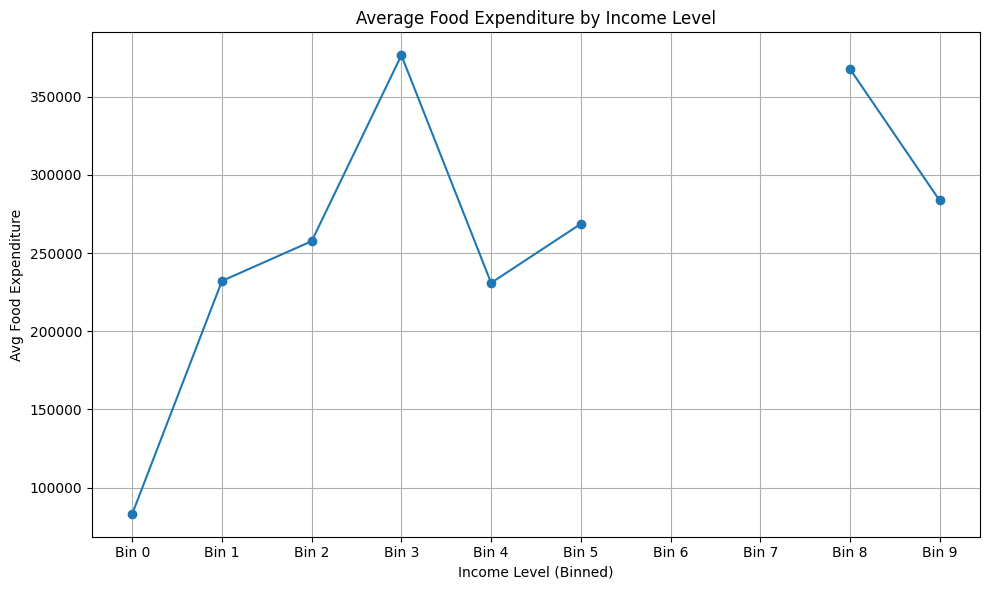

                 Income_Bin  Total Food Expenditure
0     (-519.703, 1191755.3]            83212.827884
1    (1191755.3, 2372225.6]           232169.420188
2    (2372225.6, 3552695.9]           257597.254902
3    (3552695.9, 4733166.2]           376526.923077
4    (4733166.2, 5913636.5]           230911.750000
5    (5913636.5, 7094106.8]           268662.200000
6    (7094106.8, 8274577.1]                     NaN
7    (8274577.1, 9455047.4]                     NaN
8   (9455047.4, 10635517.7]           367772.000000
9  (10635517.7, 11815988.0]           283666.500000


In [ ]:
family['Income_Bin'] = pd.cut(family['Total Household Income'], bins=10)
grouped = family.groupby('Income_Bin')['Total Food Expenditure'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped['Total Food Expenditure'], marker='o')
plt.title('Average Food Expenditure by Income Level')
plt.xlabel('Income Level (Binned)')
plt.ylabel('Avg Food Expenditure')
plt.xticks(ticks=range(len(grouped)), labels=[f'Bin {i}' for i in range(10)])
plt.grid(True)
plt.tight_layout()
plt.show()
print(grouped)

<h1>Insight 15<h1>

<h5>As household income increases, total food expenditure generally rises but at a decreasing rate. For example, the lowest income group spends around 83,213 on food, while the highest consistent spending occurs in the 3.5M–4.7M range at 376,527. Beyond this point, food expenditure fluctuates or declines, indicating that very high-income households do not necessarily spend proportionally more on food.</h5>

<hr>
<h1>16. Do married and unmarried household heads differ in average food expenditure?</h1>

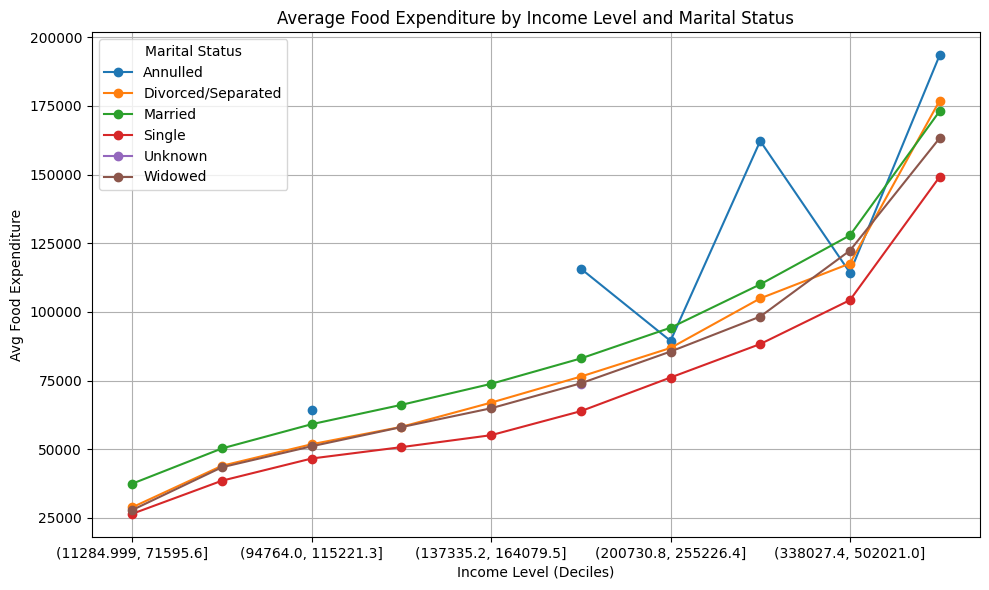

Household Head Marital Status   Annulled  Divorced/Separated        Married  \
Income_Bin                                                                    
(11284.999, 71595.6]                 NaN        28847.973568   37447.368004   
(71595.6, 94764.0]                   NaN        43959.540000   50279.950437   
(94764.0, 115221.3]             64294.00        51805.237037   59105.428748   
(115221.3, 137335.2]                 NaN        58132.519084   66144.717597   
(137335.2, 164079.5]                 NaN        66954.222222   73798.160520   
(164079.5, 200730.8]           115757.00        76444.172932   83047.379540   
(200730.8, 255226.4]            89446.50        86861.979310   94234.998139   
(255226.4, 338027.4]           162249.00       104919.823944  110030.050407   
(338027.4, 502021.0]           114300.50       117626.792308  127874.373571   
(502021.0, 11815988.0]         193471.75       176954.808696  173119.800729   

Household Head Marital Status         Single  Unkno

In [ ]:
family['Income_Bin'] = pd.qcut(family['Total Household Income'], q=10)

grouped = family.groupby(['Income_Bin', 'Household Head Marital Status'])['Total Food Expenditure'].mean().unstack()

grouped.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Food Expenditure by Income Level and Marital Status')
plt.xlabel('Income Level (Deciles)')
plt.ylabel('Avg Food Expenditure')
plt.grid(True)
plt.legend(title='Marital Status')
plt.tight_layout()
plt.show()
print(grouped)

<h1>Insight 16<h1>
<h5>

- Yes, married and unmarried household heads differ in average food expenditure.

- Married households often have larger family sizes and combined resources, which leads to higher food consumption and expenditure. Unmarried household heads, who may be single or single-parent households, tend to spend less on food, possibly due to fewer members or tighter budgets. 

- According to the Philippine Statistics Authority (PSA, 2021), married households tend to have larger household sizes, which directly increases food expenditure.

</h5>

<hr>
<h1>17. What proportion of total food expenditure is spent on rice compared to other food categories?</h1>

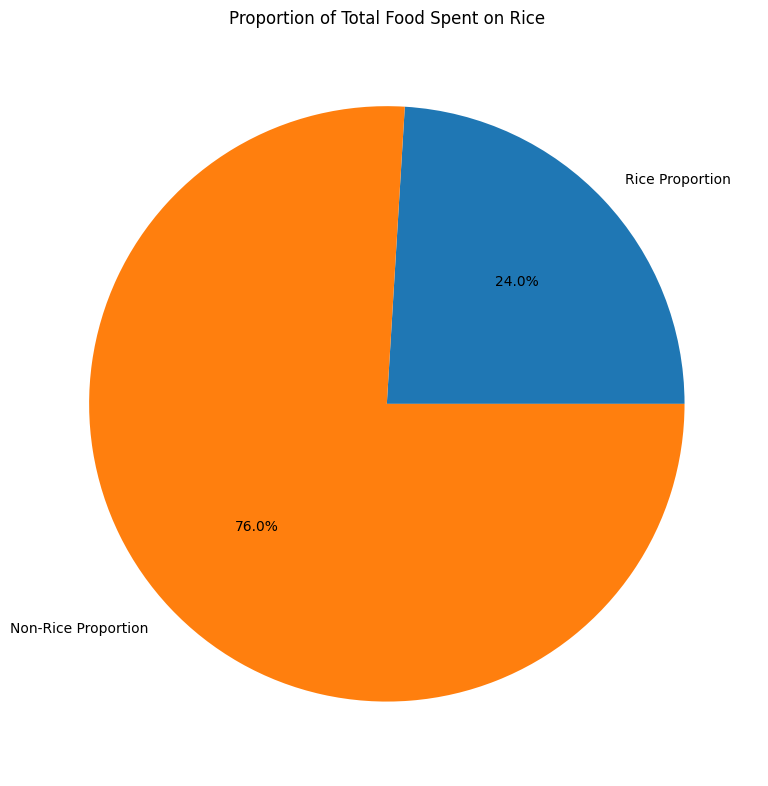

Rice Proportion        0.240382
Non-Rice Proportion    0.759618
dtype: float64


In [ ]:
family['Rice Proportion'] = family['Total Rice Expenditure'] / family['Total Food Expenditure']
family['Non-Rice Proportion'] = 1 - family['Rice Proportion']

avg_props = family[['Rice Proportion', 'Non-Rice Proportion']].mean()
avg_props.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', title='Proportion of Total Food Spent on Rice')
plt.ylabel('')
plt.tight_layout()
plt.show()
print(avg_props)

<h1>Insight 17<h1>
<h5>The pie chart reveals that, on average, rice accounts for approximately 24% of total food expenditure, while non-rice food categories make up the remaining 76%. This shows that although rice is a notable part of household food spending, the majority of food expenditures are on other types of food.<h5>

<hr>
<h1>18. Which income sources are most strongly associated with higher agricultural expenditures?</h1>

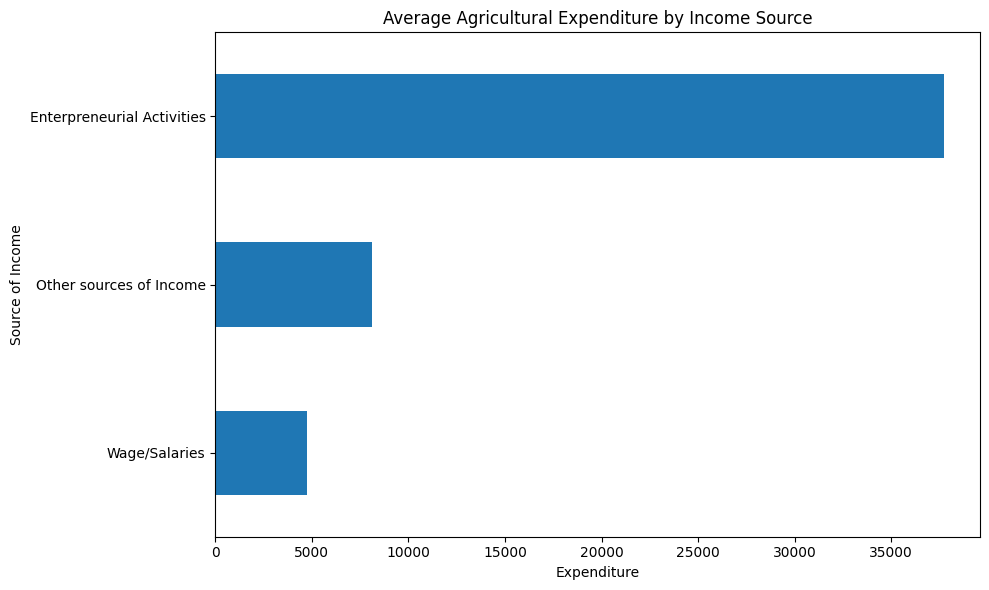

In [86]:
family.groupby('Main Source of Income')['Crop Farming and Gardening expenses'].mean().sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Average Agricultural Expenditure by Income Source')
plt.xlabel('Expenditure')
plt.ylabel('Source of Income')
plt.tight_layout()
plt.show()

<h1>Insight 18<h1>

<h5>Households whose main source of income is entrepreneurial activities have the highest agricultural expenditures, averaging 37,714.38 on crop farming and gardening. This suggests that entrepreneurial households are most strongly associated with higher spending on agriculture, compared to those earning from wage/salaries or other sources.</h5>

<hr>
<h1>19. How does house floor area correlate with total housing and water expenditure?</h1>

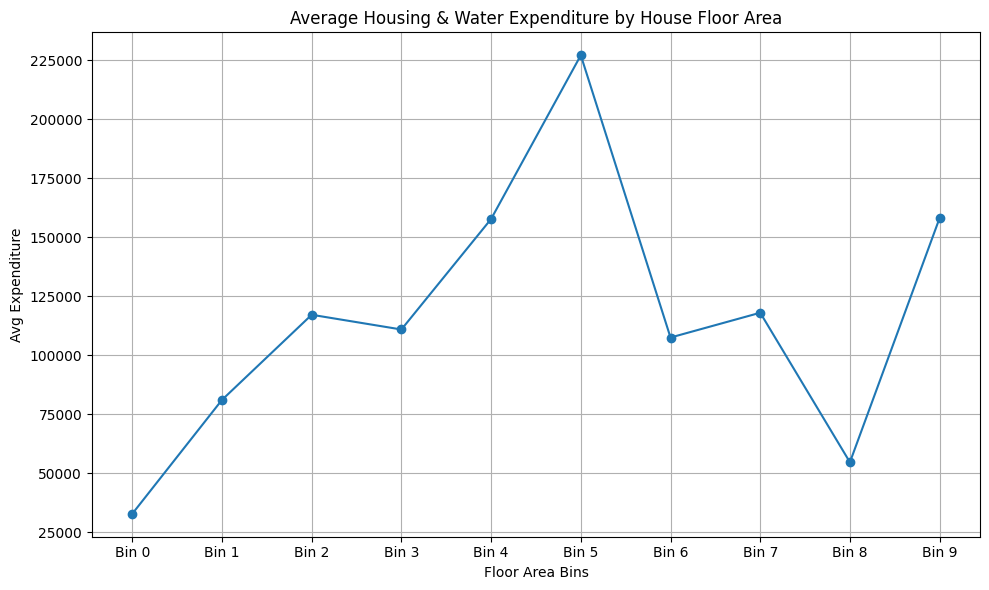

   Floor_Area_Bin  Housing and water Expenditure
0  (4.007, 104.3]                   32895.218657
1  (104.3, 203.6]                   81110.821582
2  (203.6, 302.9]                  117154.802303
3  (302.9, 402.2]                  110921.080000
4  (402.2, 501.5]                  157698.444444
5  (501.5, 600.8]                  227020.965517
6  (600.8, 700.1]                  107520.000000
7  (700.1, 799.4]                  118015.090909
8  (799.4, 898.7]                   54724.500000
9  (898.7, 998.0]                  158119.500000


In [ ]:
family['Floor_Area_Bin'] = pd.cut(family['House Floor Area'], bins=10)
grouped = family.groupby('Floor_Area_Bin')['Housing and water Expenditure'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped['Housing and water Expenditure'], marker='o')
plt.title('Average Housing & Water Expenditure by House Floor Area')
plt.xlabel('Floor Area Bins')
plt.ylabel('Avg Expenditure')
plt.xticks(ticks=range(len(grouped)), labels=[f'Bin {i}' for i in range(10)])
plt.grid(True)
plt.tight_layout()
plt.show()
print(grouped)

<h1>Insight 19<h1>

<h5>The data shows a positive correlation between house floor area and total housing and water expenditure, meaning that larger homes generally have higher costs. However, the increase is not always proportional, as some larger floor area bins show lower expenditures than smaller ones, indicating variability in spending patterns beyond just house size.</h5>

<hr>
<h1>20. How many households own a refrigerator, and how many do not?</h1>

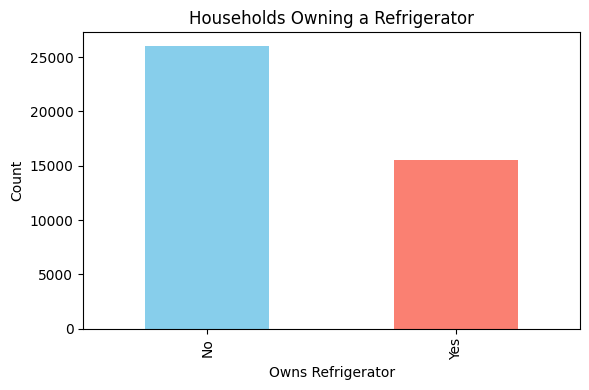

In [89]:
family['Owns Refrigerator'] = family['Number of Refrigerator/Freezer'].apply(lambda x: 'Yes' if x > 0 else 'No')

family['Owns Refrigerator'].value_counts().plot(kind='bar', figsize=(6, 4), color=['skyblue', 'salmon'])
plt.title('Households Owning a Refrigerator')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


<h1>Insight 20<h1>
<h5>The data shows that more households do not own a refrigerator (25,990) compared to those that do (15,554).</h5>

<h5>Refrigerator ownership is a strong indicator of household wealth and access to modern amenities. Higher ownership rates are typically found in urban and higher-income households, reflecting better living standards and food preservation capacity. Households without refrigerators may face challenges in food storage, impacting nutrition and food security, especially in rural or low-income areas.</h5>

<hr>
<h1>CONCLUSION/GENERAL INSIGHTS<h1>

<h5>

It is noticeably in Housing and Infrastructure that Households in formal and urbanized housing types (e.g., single houses, duplexes, multi-unit residential) show significantly higher access to improved toilet facilities, electricity, and reliable water sources.

In contrast, unconventional or marginalized housing types (e.g., boats, cave) often lack access to these amenities.

</h5>

<h5>

In terms of Expenditure Behavior, we found that among the different marital statuses, married individuals tend to have the highest income wherein Married couples often pool their resources, resulting in higher combined earnings compared to most single or divorced individuals.

Since they generally earn more, they are also more capable of owning appliances and electronic devices.

Moreover, married individuals are more likely to live with children or extended family members, which leads to higher overall food consumption.

According to the Philippine Statistics Authority (PSA, 2021), married households tend to have larger household sizes, directly contributing to increased food expenditure.

These observations suggest that marital status correlates with greater economic capacity, likely due to dual-income households or more stable earning patterns.
</h5>